In [1]:
#!pip install ipympl

In [1]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [4]:
from google.colab import output
output.enable_custom_widget_manager()

ModuleNotFoundError: No module named 'google.colab'

In [5]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

import math
import matplotlib.colors



np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [6]:
means = df.mean(axis=1)
stds = df.std(axis=1)
errors = stds  / math.sqrt(3650)
errors.head()

1992    3320.866311
1993    1628.701180
1994    2323.419534
1995    1155.026400
dtype: float64

In [7]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["midnightblue","dodgerblue","snow","lightsalmon","darkred"])
m = [32000, 43000, 43500, 48000]
s = [200000, 100000, 140000, 70000]

In [8]:
y_value = 45000

In [9]:
props = []

for i in range(len(m)):
  df_means = pd.DataFrame({'means':[np.random.normal(m[i],s[i],3650).mean() for j in range(1000)]})
  count = df_means[df_means["means"] > y_value].size
  props.append(count/1000)

colors = cmap(props)

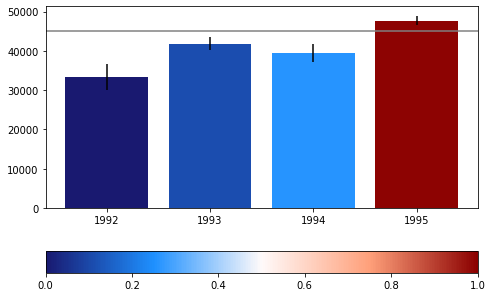

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['1992', '1993', '1994', '1995']
plt.bar(years, means, yerr=errors, color=colors)

plt.axhline(y=y_value, color="gray")


norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, orientation="horizontal")

plt.show()


In [11]:
def onclick(event):
    plt.cla()
    y_value = event.ydata

    props=[]
    m = [32000, 43000, 43500, 48000]
    s = [200000, 100000, 140000, 70000]
    
    for i in range(len(m)):
      df_means = pd.DataFrame({'means':[np.random.normal(m[i],s[i],3650).mean() for j in range(1000)]})
      count = df_means[df_means["means"] > y_value].size
      props.append(count/1000)

    colors = cmap(props)

    plt.bar(years, means, yerr=errors, color=colors)
    plt.axhline(y=y_value, color="gray")

  
    

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

5

<Figure size 432x288 with 0 Axes>